In [128]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [129]:
#now load the data set here we have two datasts where we shouls loas them
#for loading the dataset we will use pd.read_csv function to this
train_df = pd.read_csv("train.csv")

#here ia m loading the test dataset tooo
test_df = pd.read_csv("test.csv")

In [130]:
#now lets check the shape of the of the train and test dataset
print("the shape of trainig dataset is : ",train_df.shape)
print("the shape of test dataset is :", test_df.shape)

the shape of trainig dataset is :  (1168, 81)
the shape of test dataset is : (292, 80)


Observations:

A we can see the training dataset contains 1168 records and and 81 column and the test dataset contains 292 records and 80 columns so lets proced further, but i in test set we donta have the target variable, i have created a different jupyter file for which i have made necessary 

# **Exploratory Data Analysis**

In [131]:
#lets see the head of the traing dataset
train_df.head(5)

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0  127         120       RL  ...        WD         Normal    128000
1  889          20       RL  ...        WD         Normal    268000
2  793          60       RL  ...        WD         Normal    269790
3  110          20       RL  ...       COD         Normal    190000
4  422          20       RL  ...        WD         Normal    215000

[5 rows x 81 columns]

In [132]:
#as there are many columns we cant see the the all so lets try with the infomation
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

observations:

As we can see the dataset contains combinations of numerical and categorical column, also the dataset contains     some null values we will handle them in later steps
lets start with Exploratory Data Analysis

In [133]:
#creating a loop for finding the null valyes in every column and checking the percentage of missing values in the dataset
for i in train_df:
  print(i)
  print(train_df[i].value_counts())
  print(train_df[i].isnull().sum())
  print()


Id
1460    1
501     1
476     1
477     1
478     1
       ..
959     1
961     1
962     1
963     1
1       1
Name: Id, Length: 1168, dtype: int64
0

MSSubClass
20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64
0

MSZoning
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
0

LotFrontage
60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
        ... 
112.0      1
111.0      1
144.0      1
102.0      1
149.0      1
Name: LotFrontage, Length: 106, dtype: int64
214

LotArea
9600     21
7200     18
6000     16
8400     14
9000     11
         ..
9439      1
7390      1
8160      1
7388      1
13284     1
Name: LotArea, Length: 892, dtype: int64
0

Street
Pave    1164
Grvl       4
Name: Street, dtype: int64
0

Alley
Grvl    41
Pave    36
Name: Alley, dtype: int64
1091

LotShape


Here we got 18 columns that has noll values lets check the percentage of null values in each coumns, there are some columns which have over 90 percent of missing values iam going to drop them as they will bw not that useful because of the missing values


lets replace null values with appropriate method and i am ging to drop thse those columns with more than 70 percent beause replacing them also gives us unexpected results

In [134]:
#now dropping the clumns with more null values
train_df = train_df.drop(['Id', 'MiscFeature','Fence', 'PoolQC', 'Alley', 'Utilities', 'GarageYrBlt'], axis = 1)

In [135]:
#Now replacing the Null vaues with appropriate methods here i am using mode for categorical and 
#mean for numerical
train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean(), inplace = True)
train_df['MasVnrType'].fillna(method = 'bfill', inplace = True)
train_df['BsmtQual'].fillna(method = 'ffill', inplace = True)
train_df['BsmtCond'].fillna(method = 'ffill', inplace = True) 
train_df['MasVnrArea'].fillna(method = 'ffill', inplace = True)
train_df['BsmtExposure'].fillna(method = 'ffill', inplace = True)
train_df['BsmtFinType1'].fillna(method = 'ffill', inplace = True)
train_df['BsmtFinType2'].fillna(method = 'ffill', inplace = True)
train_df['FireplaceQu'].fillna(method = 'bfill', inplace = True)
train_df['GarageType'].fillna(method = 'bfill', inplace = True)
train_df['GarageFinish'].fillna(method = 'bfill', inplace = True)
train_df['GarageQual'].fillna(method = 'bfill', inplace = True)
train_df['GarageCond'].fillna(method = 'bfill', inplace = True)



In [136]:
#after replacing checking the information of dataset aqfter replacing the null values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   LotConfig      1168 non-null   object 
 8   LandSlope      1168 non-null   object 
 9   Neighborhood   1168 non-null   object 
 10  Condition1     1168 non-null   object 
 11  Condition2     1168 non-null   object 
 12  BldgType       1168 non-null   object 
 13  HouseStyle     1168 non-null   object 
 14  OverallQual    1168 non-null   int64  
 15  OverallCond    1168 non-null   int64  
 16  YearBuilt      1168 non-null   int64  
 17  YearRemodAdd   1168 non-null   int64  
 18  RoofStyl

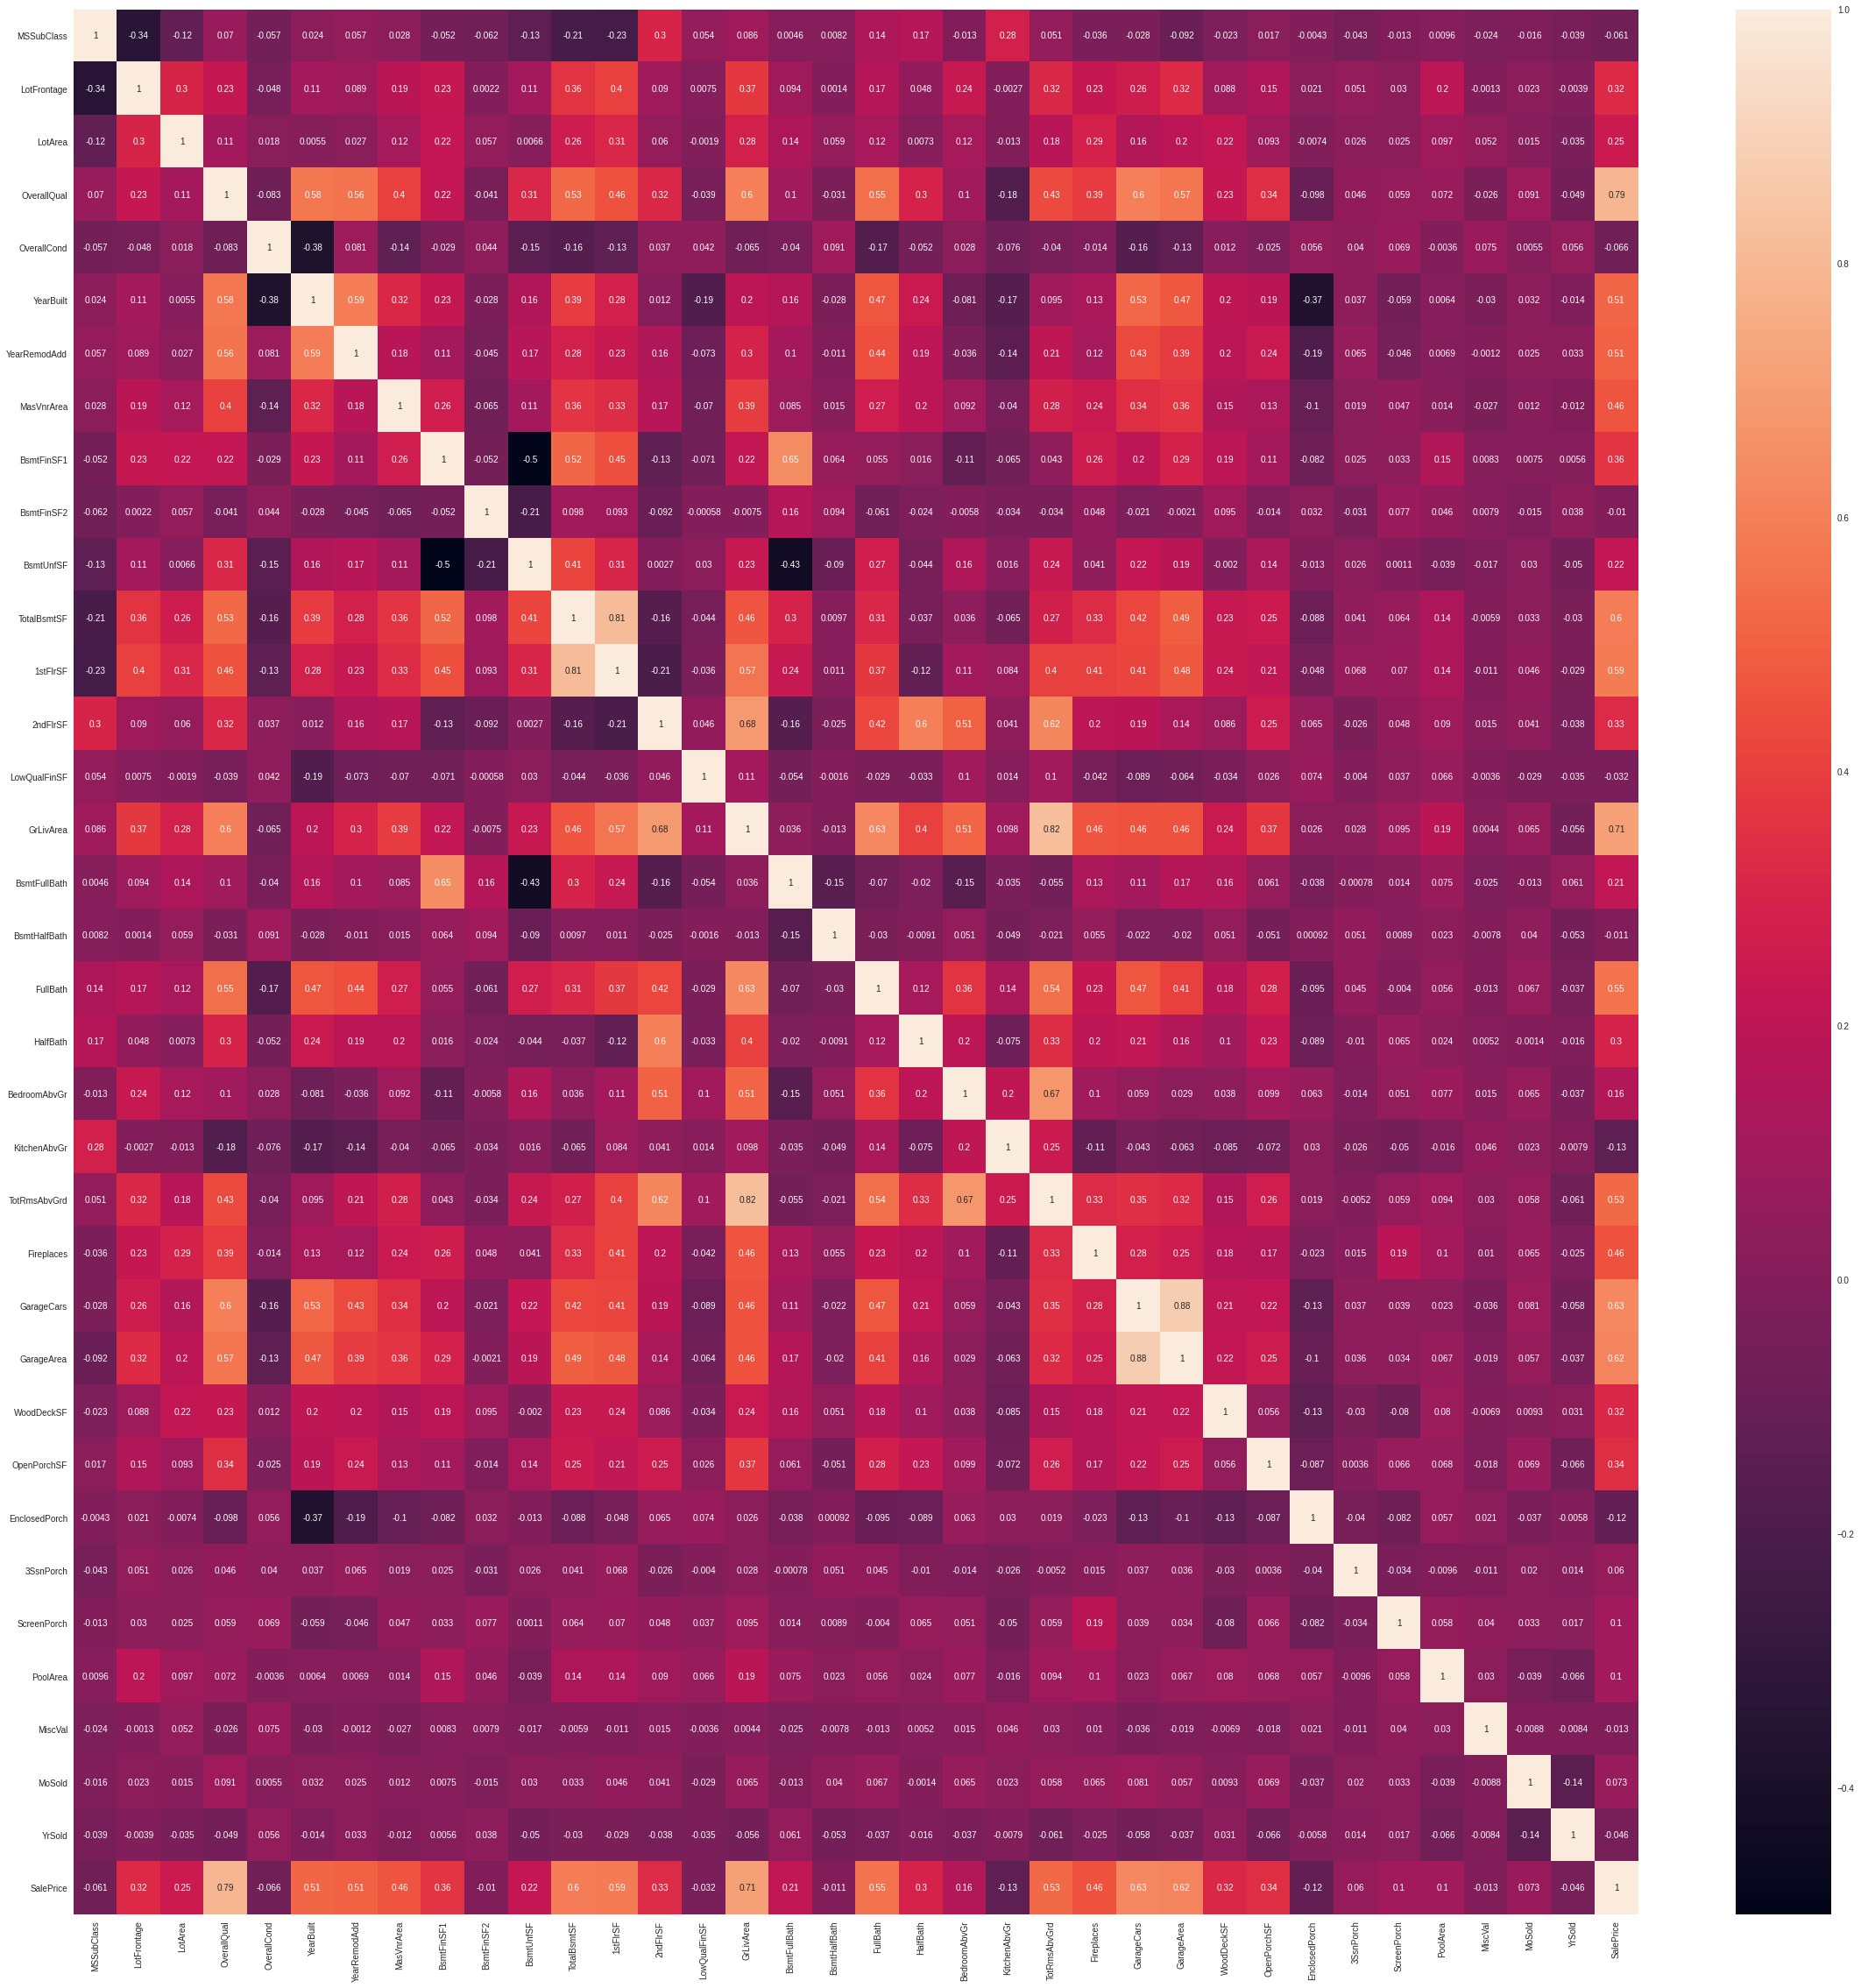

In [137]:
#lets check the correlation of the data
plt.figure(figsize=(40,40))
sns.heatmap(train_df.corr(), annot = True)

tried of visualizing the correlation but it soo long so long that we cannot make that visually

In [138]:
#there are some high correlated values in the dataset so lets remove them using a function
def correlation(dataset, threshold):
    cor_set = set()
    corr_matrix = train_df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j] > threshold):
                colname = corr_matrix.columns[i]
                cor_set.add(colname)
    return cor_set

fea = correlation(train_df, 0.7)
print(fea)

{'GarageArea', 'TotRmsAbvGrd', 'SalePrice', '1stFlrSF'}


Here i created a function throuh with i tried to i try to find the important columns that has multicolinearity i have tried to drop them but 3 of those columns are important cz they have some importance

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2868c00510>,
      dtype=object)

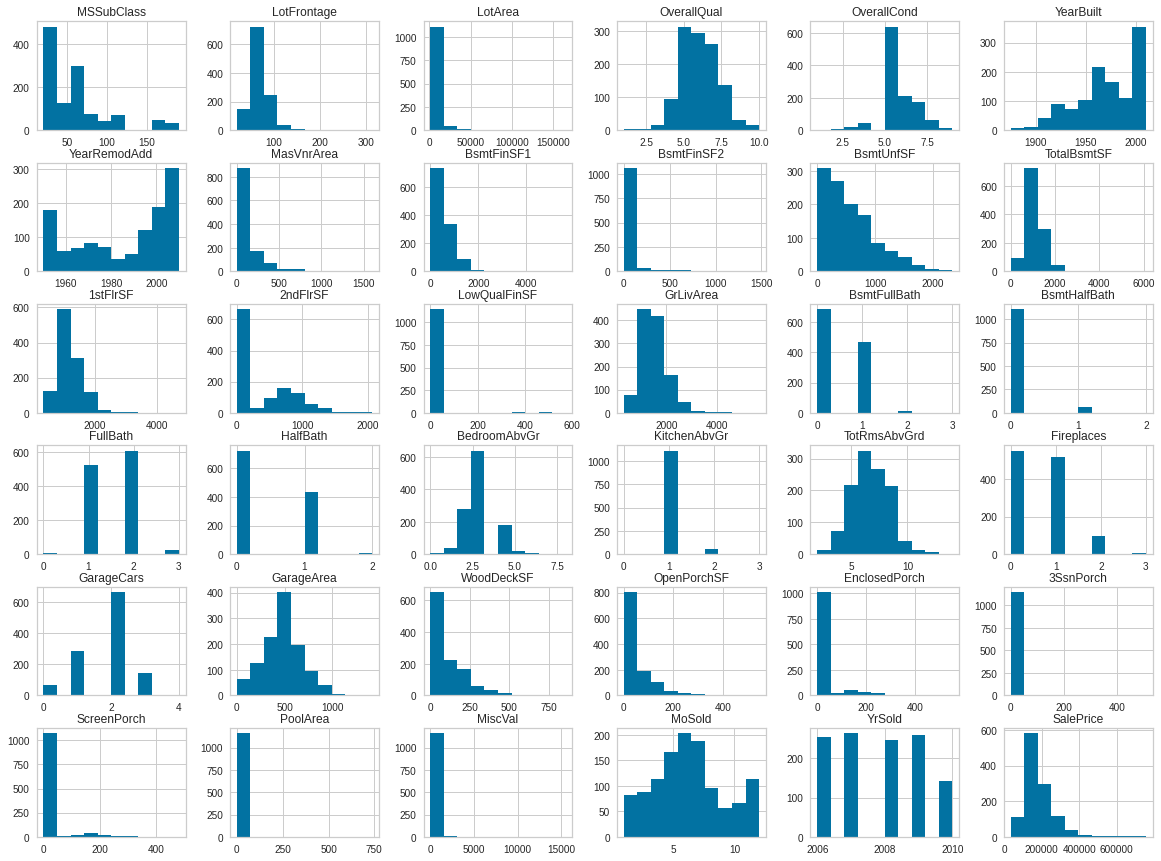

In [139]:
#plotting the hist bar of dataset
train_df.hist(figsize=(20,15), sharex=False)

Observation:

when we comapre all the numerical data into consideration we got that most of the data is a kind of normalized but some of the dat had skewed a bit either right or left and we have to make them skewed
so i am going to apply some transformations like log normal transformation and 

In [140]:
#here i am dividing the data into categoriacl and numerical data and with them we can continuw with visualization
num_cols = [col for col in train_df.columns if train_df[col].dtypes != 'object']
print(num_cols)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [141]:
#Here i am creating a function for skewness transformation
from scipy import stats
import pylab
def log_transform(dataframe, feature):
  dataframe_copy = dataframe.copy()
  if 0 in dataframe_copy[feature].unique():
    pass
  else:
    dataframe_copy[feature] = np.log(dataframe_copy[feature])
    plt.figure(figsize= (10,5))
    plt.subplot(1,2,1)
    stats.probplot(dataframe_copy[feature], dist = 'norm', plot = pylab)
    plt.subplot(1,2,2)
    dataframe_copy[feature].hist()
    plt.title("log transform")
    print(dataframe_copy[feature].skew())

In [142]:
def res_transform(dataframe, feature):
  dataframe_copy = dataframe.copy()
  if 0 in dataframe_copy[feature].unique():
    pass
  else:
    dataframe_copy[feature] = 1/dataframe_copy[feature]
    plt.figure(figsize= (10,5))
    plt.subplot(1,2,1)
    stats.probplot(dataframe_copy[feature], dist = 'norm', plot = pylab)
    plt.subplot(1,2,2)
    dataframe_copy[feature].hist()
    plt.title("reciprocal transform")
    print(dataframe_copy[feature].skew())

In [143]:
def sqr_transform(dataframe, feature):
  dataframe_copy = dataframe.copy()
  if 0 in dataframe_copy[feature].unique():
    pass
  else:
    dataframe_copy[feature] = dataframe_copy[feature]**(1/2)
    plt.figure(figsize= (10,5))
    plt.subplot(1,2,1)
    stats.probplot(dataframe_copy[feature], dist = 'norm', plot = pylab)
    plt.subplot(1,2,2)
    dataframe_copy[feature].hist()
    plt.title("sqr transform")
    print(dataframe_copy[feature].skew())

0.21878044405843525
1.422018988135284
-0.8557452975171383
2.7103829016240844
-0.16967981002018756
10.659284548299626
-1.0664066827438563
0.1750824992845271
-0.8335775836368419
0.5807139655333367
-0.6062589329788147
-0.5792035025736898
-0.5031718275799453
-0.49586353822203716
2.8353520952445974
1.8716059327957582
4.365829146359866
0.9090571206651619
1.7445908855423957
0.10481572695015284
1.5137072331415693
0.8234785103609108
8.666142302049042
0.0005547201052418443
1.4499515426476701
0.6271059162466773
4.264402760829792
0.05780870861471475
0.6564917514090118
0.2438552945621391
4.365258908133523
-0.2045374827169213
0.6446565826319272
0.6719656450265
-0.3585558146314816
0.18966497539008143
1.504929246192858
2.41083972347696
3.0436098308918846
9.770611216755274
4.105740751686475
13.243710763499866
23.065942802581013
-1.313225984432617
0.22097863147453375
0.11496304110474319
0.1157647118679818
0.07359740998337982
1.953877705368286


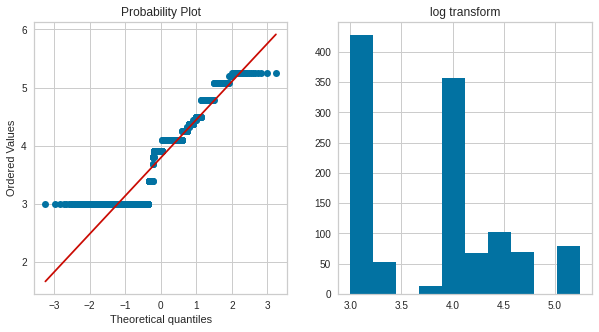

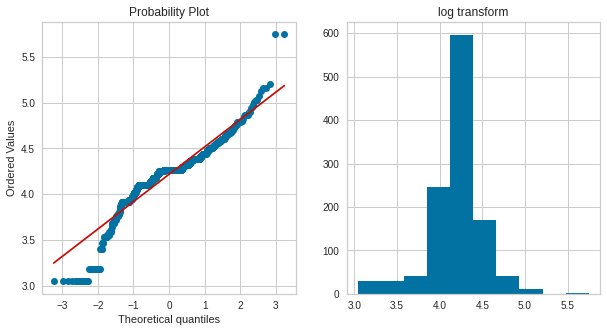

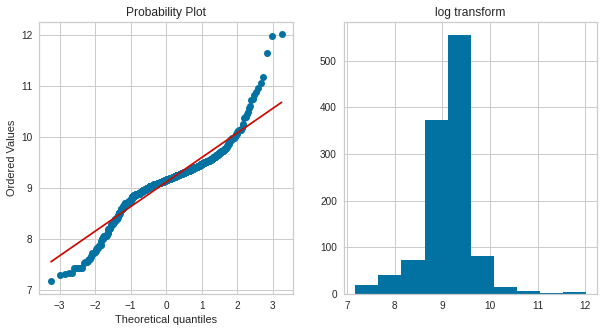

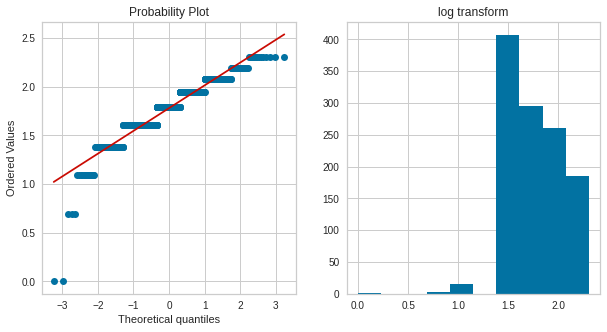

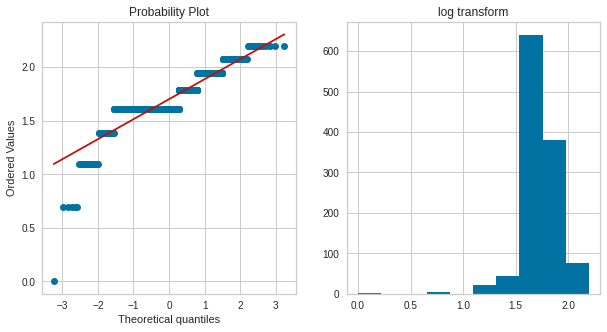

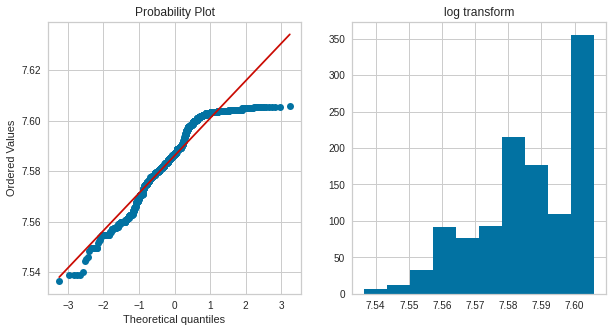

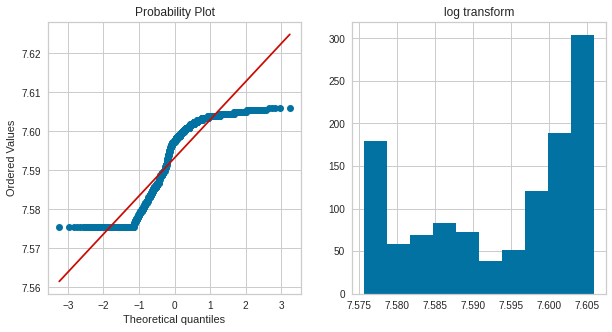

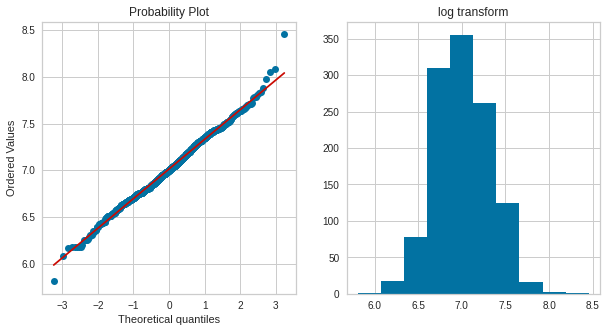

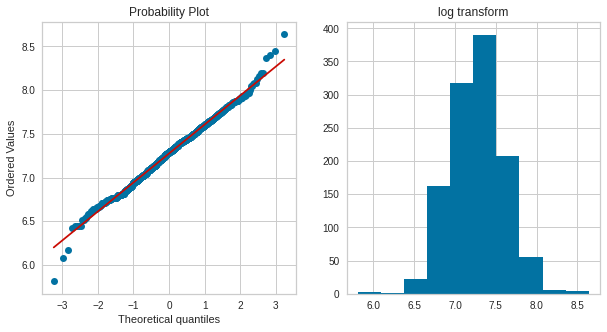

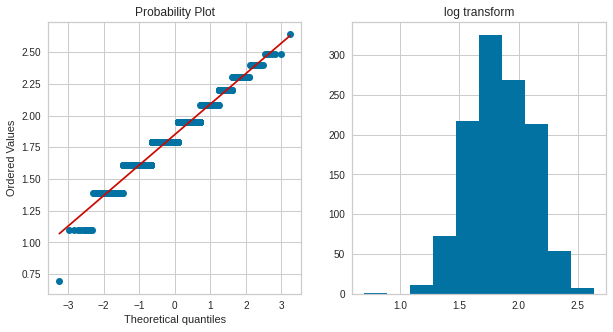

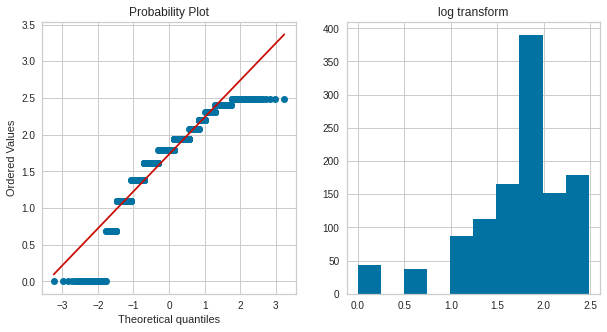

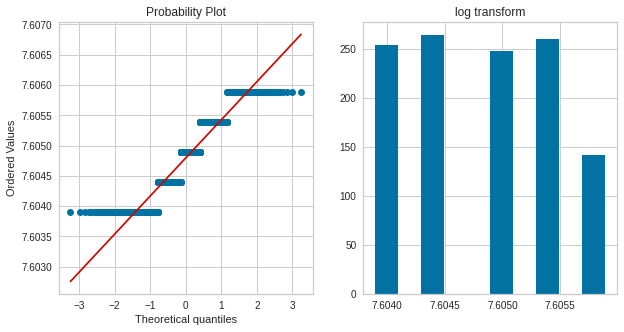

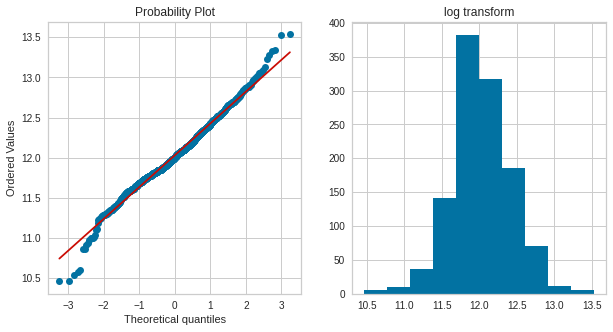

In [144]:
#applying the skewnes transformation of the data so that we can eliminate the skewness of the data 
for i in num_cols:
  log_transform(train_df, i)
  print(train_df[i].skew())


Here i am using probplot and logtransform plots to representthe changes of the data, when compared to all the transformation log transform method helps to adjust the skewness of the data 

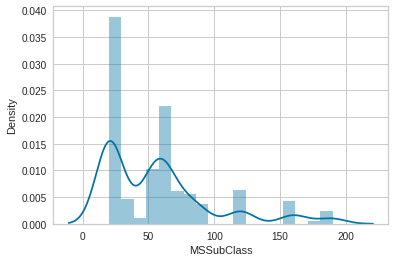

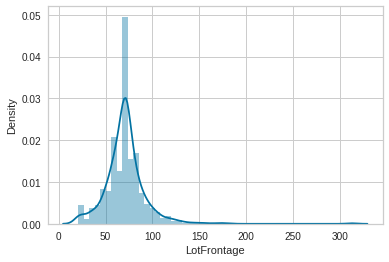

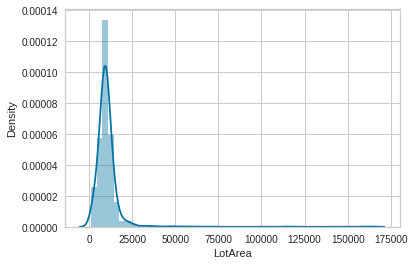

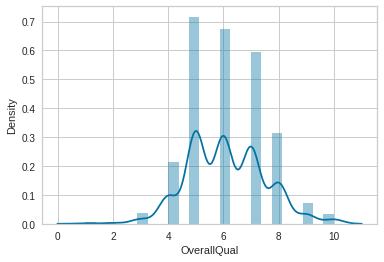

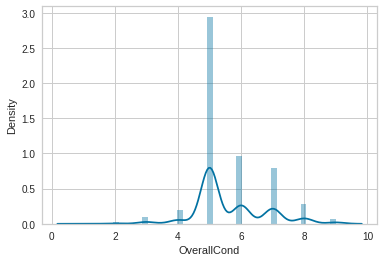

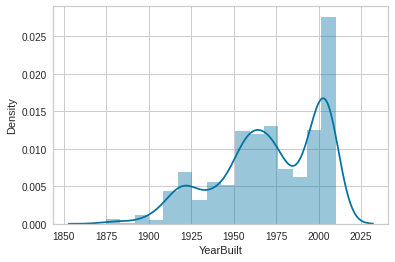

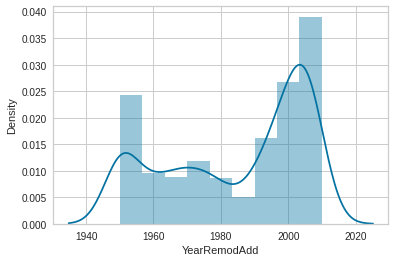

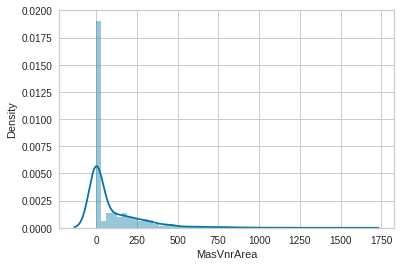

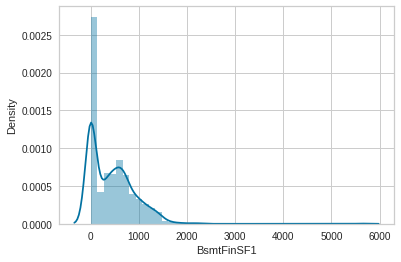

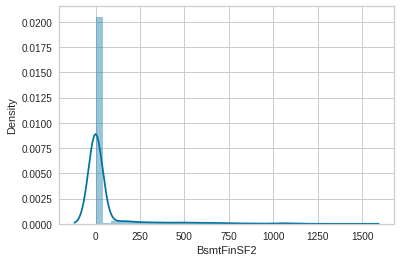

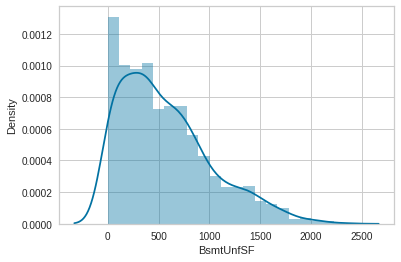

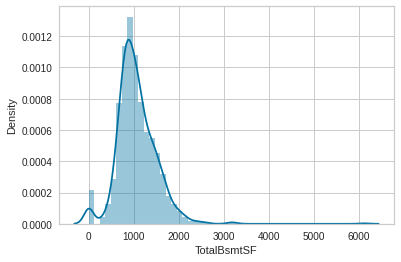

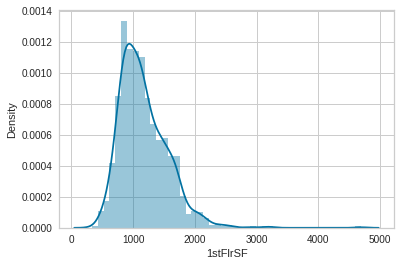

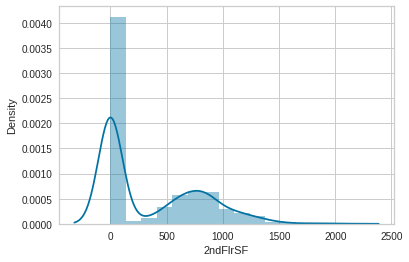

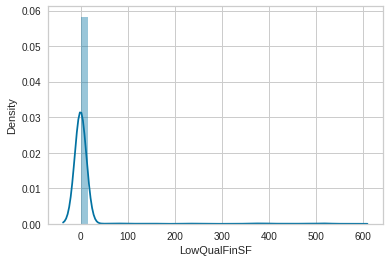

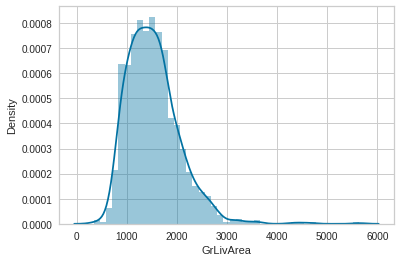

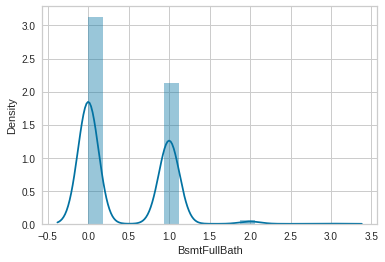

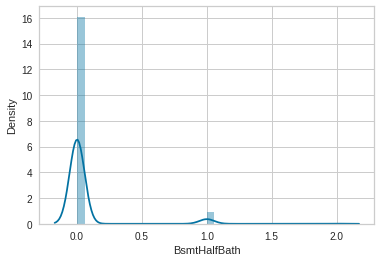

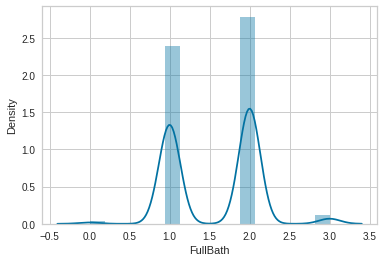

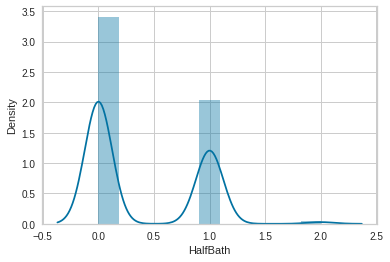

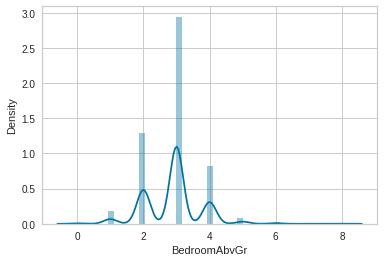

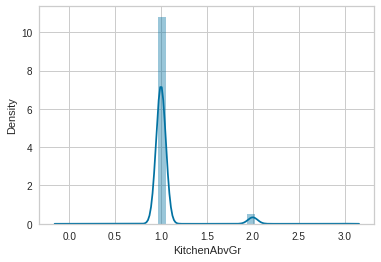

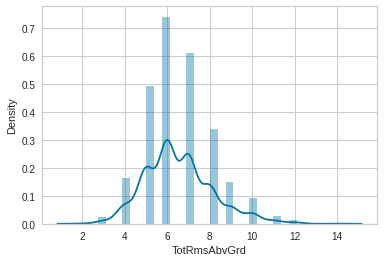

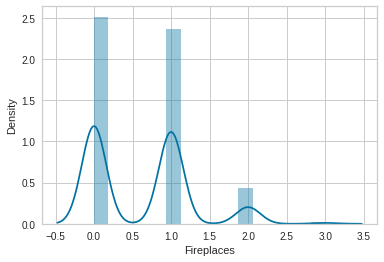

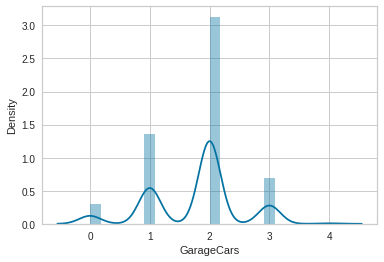

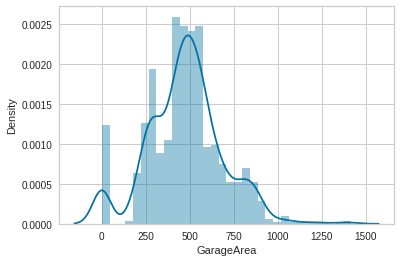

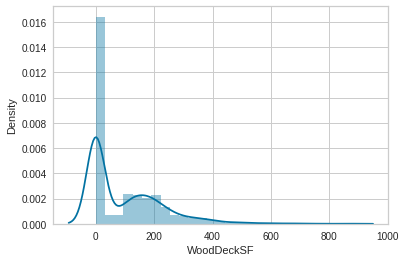

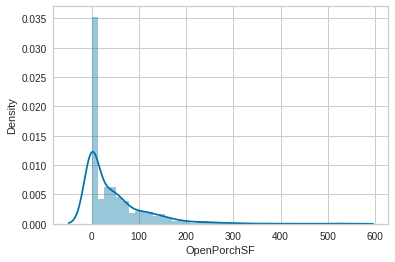

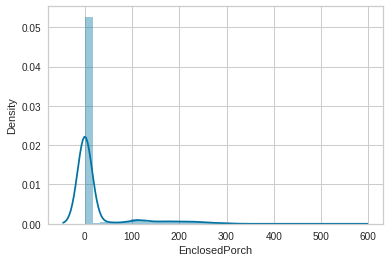

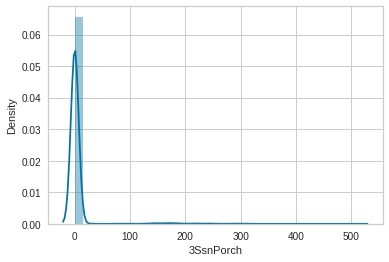

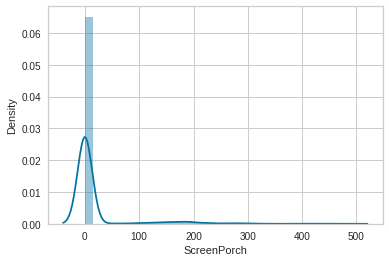

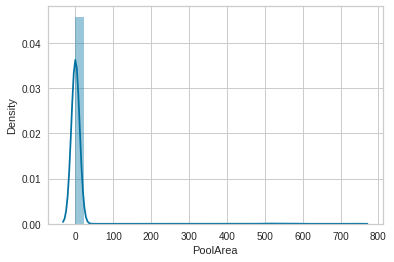

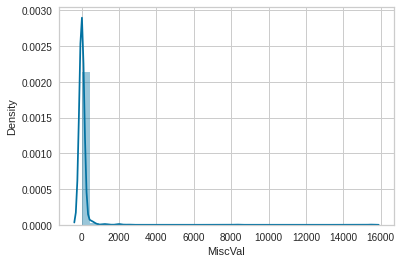

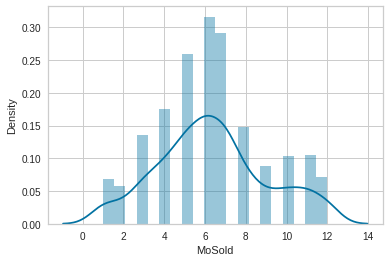

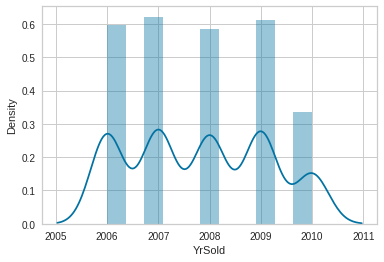

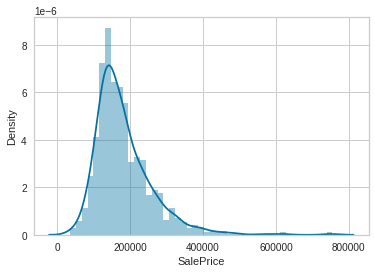

In [145]:
#checking the skewness again
for i in num_cols:
  sns.distplot(train_df[i])
  plt.show()

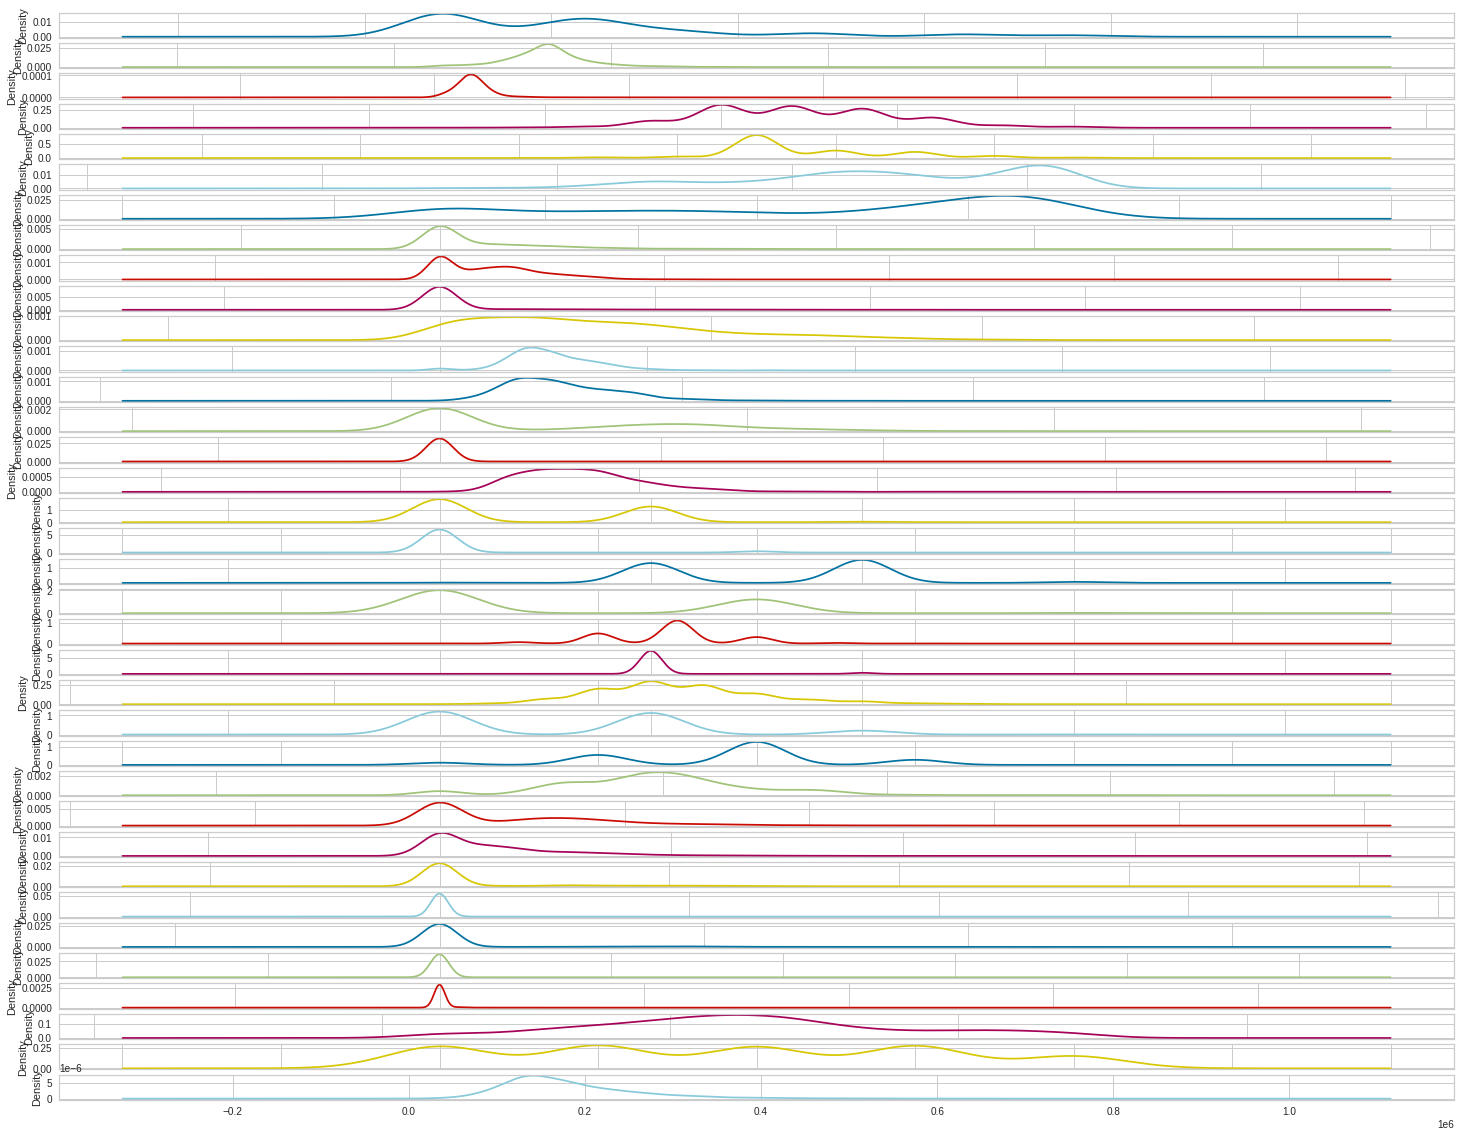

In [146]:
#Plotting the density function
train_df.plot(kind = 'density', subplots = True, sharex = False, legend = False, figsize = (25,20))
plt.show()

MSSubClass          AxesSubplot(0.125,0.125;0.0180233x0.755)
LotFrontage      AxesSubplot(0.146628,0.125;0.0180233x0.755)
LotArea          AxesSubplot(0.168256,0.125;0.0180233x0.755)
OverallQual      AxesSubplot(0.189884,0.125;0.0180233x0.755)
OverallCond      AxesSubplot(0.211512,0.125;0.0180233x0.755)
YearBuilt         AxesSubplot(0.23314,0.125;0.0180233x0.755)
YearRemodAdd     AxesSubplot(0.254767,0.125;0.0180233x0.755)
MasVnrArea       AxesSubplot(0.276395,0.125;0.0180233x0.755)
BsmtFinSF1       AxesSubplot(0.298023,0.125;0.0180233x0.755)
BsmtFinSF2       AxesSubplot(0.319651,0.125;0.0180233x0.755)
BsmtUnfSF        AxesSubplot(0.341279,0.125;0.0180233x0.755)
TotalBsmtSF      AxesSubplot(0.362907,0.125;0.0180233x0.755)
1stFlrSF         AxesSubplot(0.384535,0.125;0.0180233x0.755)
2ndFlrSF         AxesSubplot(0.406163,0.125;0.0180233x0.755)
LowQualFinSF     AxesSubplot(0.427791,0.125;0.0180233x0.755)
GrLivArea        AxesSubplot(0.449419,0.125;0.0180233x0.755)
BsmtFullBath     AxesSub

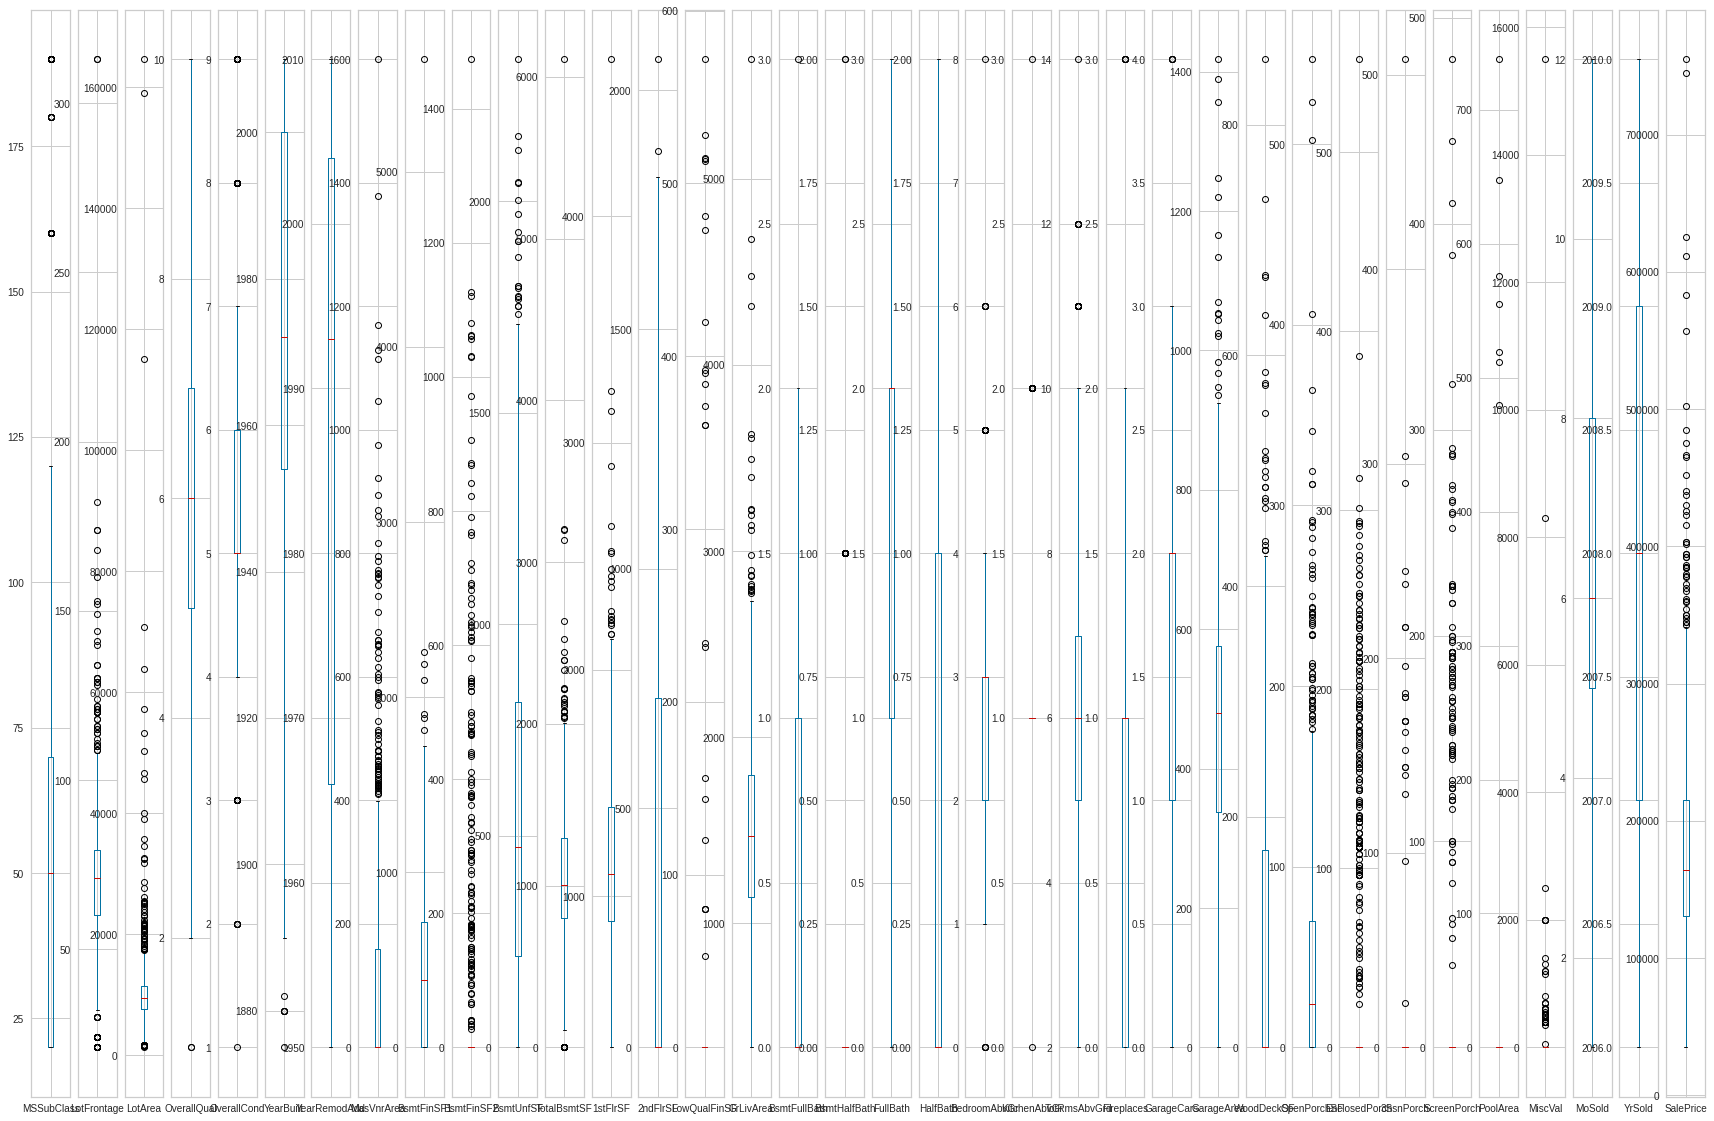

In [147]:
#plotting the boxplot
train_df.plot(kind = "box", figsize = (30,20), subplots = True, sharex = False)

IN the above boxplot we have some of the outliers and we havw to manage them in order to get good accuracy of the model and what i observed from this data is most outlies are extreme values so no need to filter

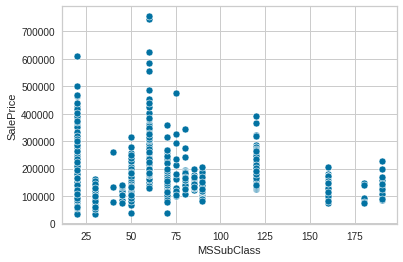

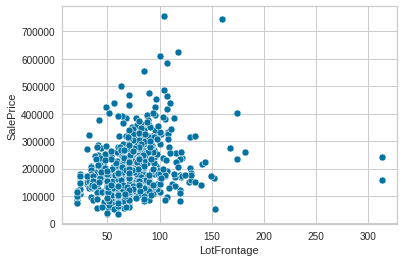

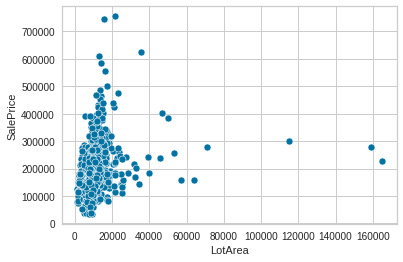

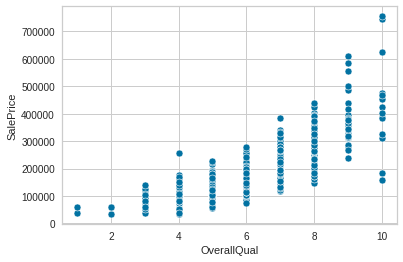

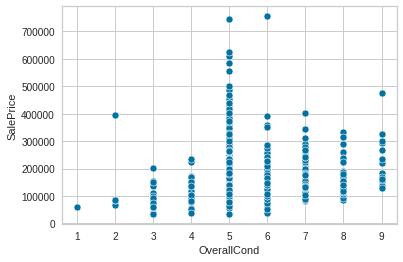

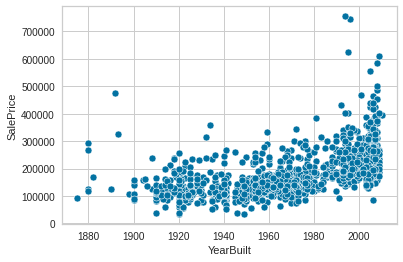

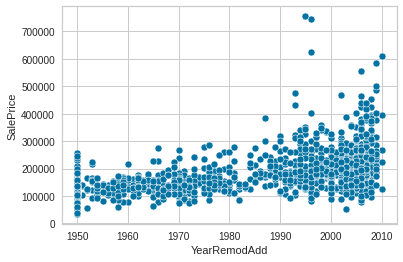

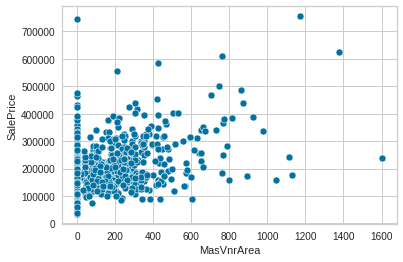

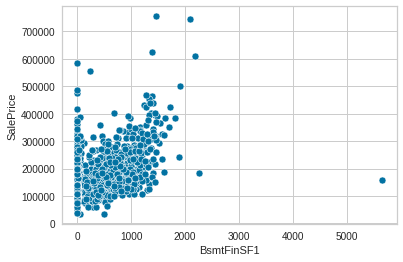

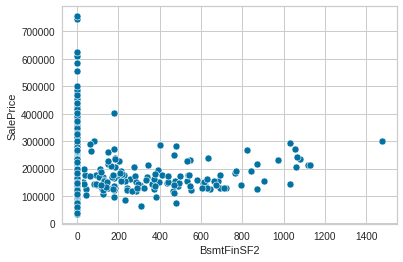

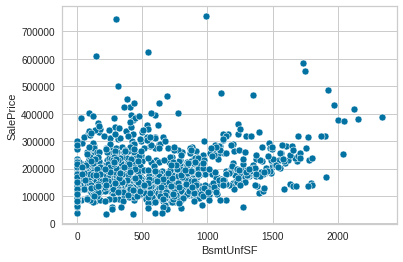

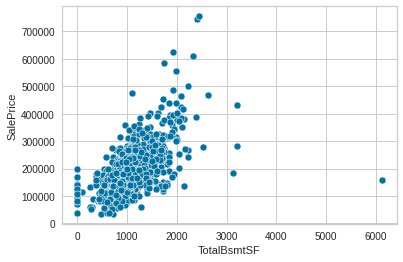

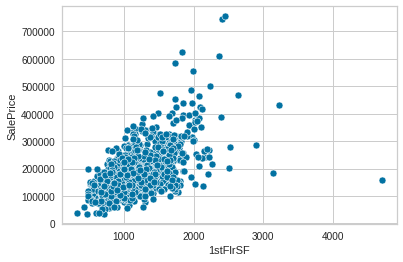

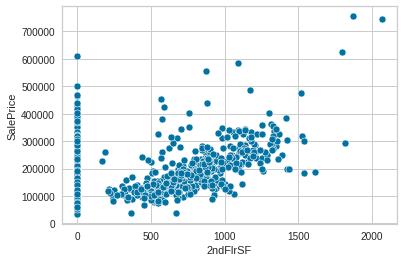

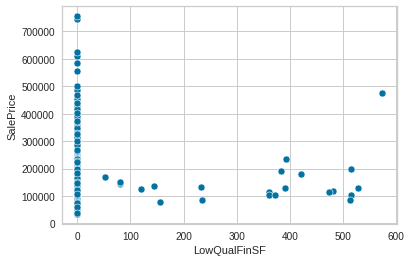

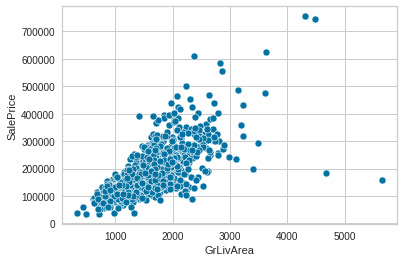

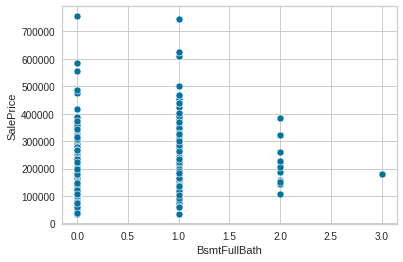

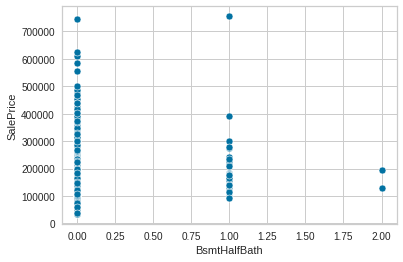

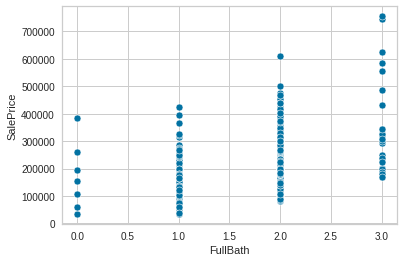

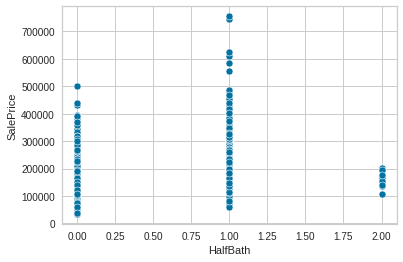

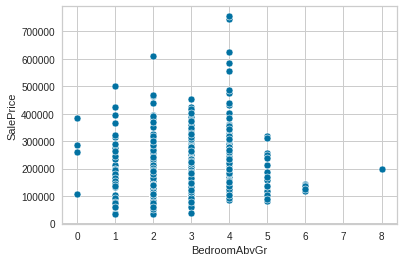

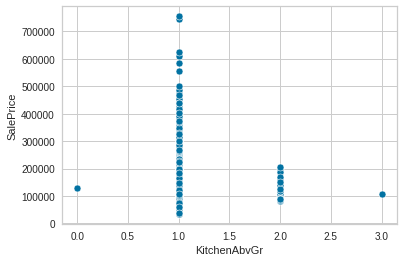

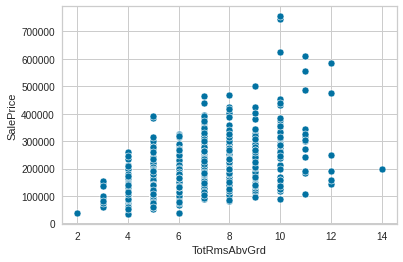

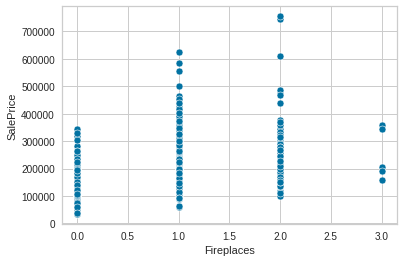

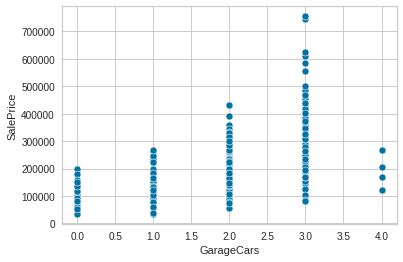

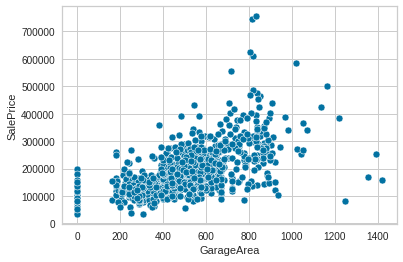

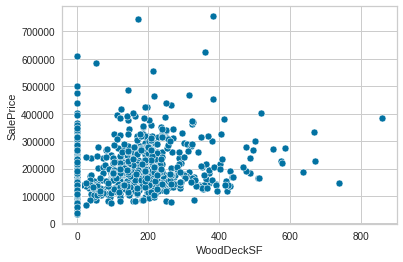

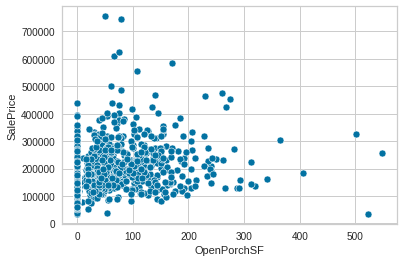

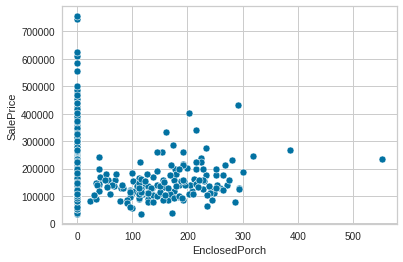

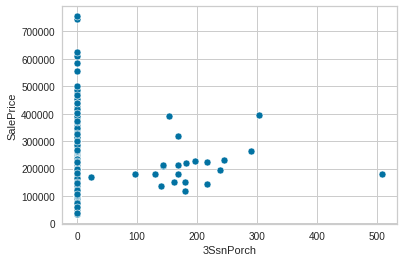

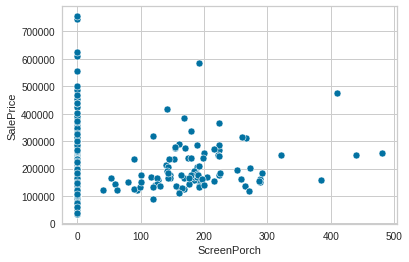

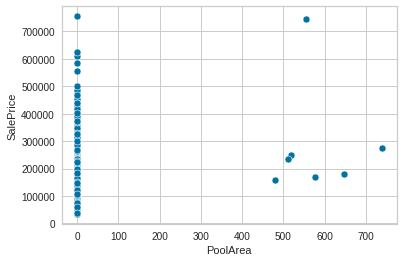

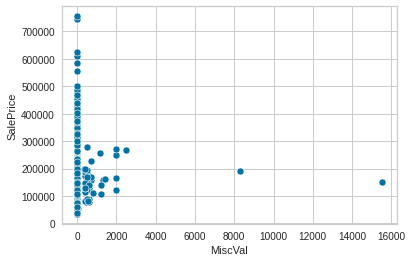

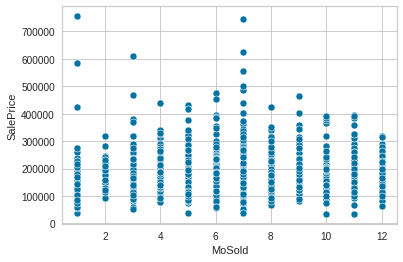

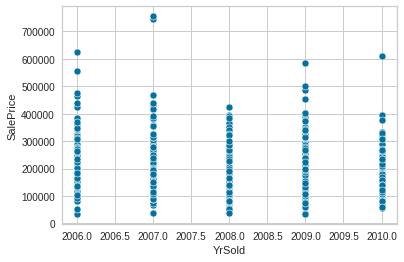

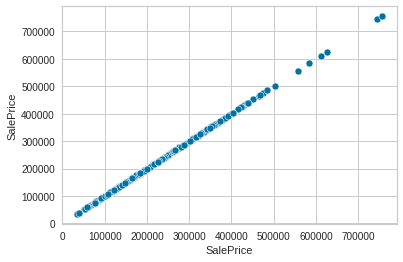

In [148]:
for i in num_cols:
  sns.scatterplot(data = train_df, x = i, y = 'SalePrice')
  plt.show()

from the above scatter plot what we have observed is if any house that has pool area, open porch wooden desk and another some of features the price values aalso increase and also with the area of the house situated the pric of the house also increases

count      1168.000000
mean     181477.005993
std       79105.586863
min       34900.000000
25%      130375.000000
50%      163995.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64
Skew is: 1.953877705368286


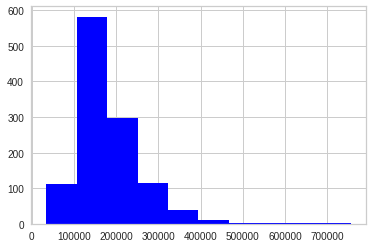


 Skew is: 0.07359740998337982


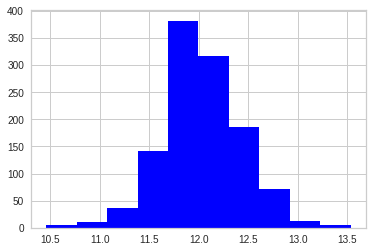

In [149]:
# to get more information like count, mean, std, min, max etc
# train.SalePrice.describe()
print (train_df.SalePrice.describe())



# to plot a histogram of SalePrice
print ("Skew is:", train_df.SalePrice.skew())
plt.hist(train_df.SalePrice, color='blue')
plt.show()



# use np.log() to transform train.SalePric and calculate the skewness a second time, as well as re-plot the data
target = np.log(train_df.SalePrice)
print ("\n Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()


In [150]:
#checking the shape of dataset
train_df.shape

(1168, 74)

Lets proceed with the analysis of the data set here there is problem in the test dataset i have created another notebook that handles the test dataset and when i am handling i observed that categorical columns differed in the train and test dataset because of that first i will merge the test and train dataset and after appying the necessary encoding i will divide them

In [151]:
#at first lets divide the catrgorical columns in the dataset we have
cat_cols = [col for col in train_df.columns if train_df[col].dtypes == 'object']
cat_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [152]:
#Lets create a function here to convert all the categorical columns using one hot encoding and coverts data
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final


In [153]:
#maintaining a copy of the original dataset is good as it will be useful for the further analysis
main_df=train_df.copy()

In [154]:


## actually its the same test data i have just cleaned the test data and changed its name to firmulated 
test_df=pd.read_csv('formulated_test_df.csv')
test_df.head()


Unnamed: 0  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0           0          20       RL  ...    2007        WD        Normal
1           1         120       RL  ...    2009       COD       Abnorml
2           2          20       RL  ...    2009        WD        Normal
3           3          70       RL  ...    2009        WD        Normal
4           4          60       RL  ...    2008        WD        Normal

[5 rows x 74 columns]

In [155]:
#dropping the unnamed column that was not useful
test_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [156]:
#again cheking the info after changes happen
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    int64  
 1   MSZoning       292 non-null    object 
 2   LotFrontage    292 non-null    float64
 3   LotArea        292 non-null    int64  
 4   Street         292 non-null    object 
 5   LotShape       292 non-null    object 
 6   LandContour    292 non-null    object 
 7   LotConfig      292 non-null    object 
 8   LandSlope      292 non-null    object 
 9   Neighborhood   292 non-null    object 
 10  Condition1     292 non-null    object 
 11  Condition2     292 non-null    object 
 12  BldgType       292 non-null    object 
 13  HouseStyle     292 non-null    object 
 14  OverallQual    292 non-null    int64  
 15  OverallCond    292 non-null    int64  
 16  YearBuilt      292 non-null    int64  
 17  YearRemodAdd   292 non-null    int64  
 18  RoofStyle 

In [157]:
#checking the shape of the test data
test_df.shape

(292, 73)

In [158]:
#checking the shape of training data
train_df.shape

(1168, 74)

In [159]:
#So as we can se we ahve same amount of columns in the dataset and we need to merge them
#so that we can arrange them
final_df=pd.concat([train_df,test_df],axis=0)

In [160]:
#checking the final dataset
final_df

MSSubClass MSZoning  LotFrontage  ...  SaleType SaleCondition SalePrice
0           120       RL    70.988470  ...        WD        Normal  128000.0
1            20       RL    95.000000  ...        WD        Normal  268000.0
2            60       RL    92.000000  ...        WD        Normal  269790.0
3            20       RL   105.000000  ...       COD        Normal  190000.0
4            20       RL    70.988470  ...        WD        Normal  215000.0
..          ...      ...          ...  ...       ...           ...       ...
287          20       RL    78.000000  ...        WD        Normal       NaN
288          20       RL    57.000000  ...        WD        Normal       NaN
289          20       RL    66.425101  ...        WD        Normal       NaN
290          50       RM    50.000000  ...        WD        Normal       NaN
291         160       RM    21.000000  ...        WD        Normal       NaN

[1460 rows x 74 columns]

In [161]:
#checking the information of the final data
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 291
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyle

In [162]:
#as we can see we dont have any null values here lets continue and convert them into numerical columns 
final_df=category_onehot_multcols(cat_cols)


MSZoning
Street
LotShape
LandContour
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [163]:
#checking th e shape of the dataset after conveting the columns
final_df.shape

(1460, 235)

In [164]:
#this step is mainly for removing the redundencied in the dataset
final_df =final_df.loc[:,~final_df.columns.duplicated()]
print(final_df.shape)

(1460, 175)


In [165]:
#now dividing the whole sinal dataset into test and train dataset and getting their shapes
df_Train=final_df.iloc[:1168,:]
df_Test=final_df.iloc[1168:,:]
print("the shape of training data:", df_Train.shape)
print("the shape of test data:", df_Test.shape)

the shape of training data: (1168, 175)
the shape of test data: (292, 175)


In [166]:
#checking the head of train data 
df_Train.head()

MSSubClass  LotFrontage  LotArea  ...  Family  Normal  Partial
0         120     70.98847     4928  ...       0       1        0
1          20     95.00000    15865  ...       0       1        0
2          60     92.00000     9920  ...       0       1        0
3          20    105.00000    11751  ...       0       1        0
4          20     70.98847    16635  ...       0       1        0

[5 rows x 175 columns]

In [167]:
#checking the head of the test data 
df_Test.head()

MSSubClass  LotFrontage  LotArea  ...  Family  Normal  Partial
0          20    86.000000    14157  ...       0       1        0
1         120    66.425101     5814  ...       0       0        0
2          20    66.425101    11838  ...       0       1        0
3          70    75.000000    12000  ...       0       1        0
4          60    86.000000    14598  ...       0       1        0

[5 rows x 175 columns]

In [168]:
#dropping the sales column in the test dataset
df_Test.drop(['SalePrice'],axis=1,inplace=True)

In [169]:
#this function is so important as it shows the statistical information regarding the dataset it basically gives information like 
#mean, median and other information like standard deviation
df_Train.describe().T

count          mean          std  ...         50%       75%       max
MSSubClass   1168.0     56.767979    41.940650  ...    50.00000     70.00     190.0
LotFrontage  1168.0     70.988470    22.437056  ...    70.98847     79.25     313.0
LotArea      1168.0  10484.749144  8957.442311  ...  9522.50000  11515.50  164660.0
OverallQual  1168.0      6.104452     1.390153  ...     6.00000      7.00      10.0
OverallCond  1168.0      5.595890     1.124343  ...     5.00000      6.00       9.0
...             ...           ...          ...  ...         ...       ...       ...
AdjLand      1168.0      0.003425     0.058445  ...     0.00000      0.00       1.0
Alloca       1168.0      0.010274     0.100882  ...     0.00000      0.00       1.0
Family       1168.0      0.015411     0.123233  ...     0.00000      0.00       1.0
Normal       1168.0      0.809075     0.393198  ...     1.00000      1.00       1.0
Partial      1168.0      0.092466     0.289806  ...     0.00000      0.00       1.0

[175 rows x 8 columns]

In [170]:
#Now spliting the dataset into test and train data so that we can prepare for the model creation
x = df_Train.drop(["SalePrice"], axis = 1)
y = df_Train['SalePrice']
print(x.shape, y.shape)

(1168, 174) (1168,)


# **Model Creation**

In [171]:
#importing necessary libraries
from sklearn.model_selection import train_test_split, KFold, cross_val_score,RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from math import sqrt

In [172]:
#spliting the data into test and train
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state = 100, test_size = 0.10)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1051, 174) (117, 174) (1051,) (117,)


In [173]:
#now checking the cross_val_score of models to get the best model 
models = []
models.append(('LR', LinearRegression()))
models.append(('L', Lasso()))
models.append(('DEC', DecisionTreeRegressor()))
models.append(('R', Ridge()))
models.append(('RAN', RandomForestRegressor()))
models.append(('ADA', AdaBoostRegressor()))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=100)
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring='r2')
    
    results.append(cv_results)
    names.append(name)
    
    msg = '%s: %f, %f' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.646041, 0.233944
L: 0.658318, 0.220717
DEC: 0.671668, 0.176105
R: 0.794707, 0.139822
RAN: 0.837137, 0.082420
ADA: 0.783610, 0.064124


In [174]:
#initialising the model with some variables
lr = LinearRegression()
l = Lasso()
dec = DecisionTreeRegressor()
r = Ridge()
ran = RandomForestRegressor()
ada = AdaBoostRegressor()

0.9049361564054988
score of  lr  training set is: 90.49361564054989
r2 score is : 0.8474627176755917
MSE : 755122489.3683844
MAE : 16954.61680805595
RMSE: 27479.492159943282


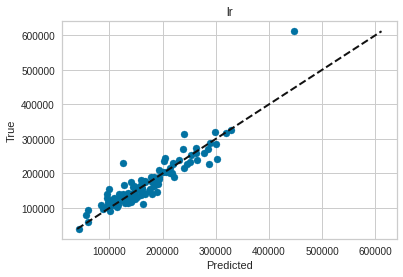

---------------------------------------------------------------------------
0.9048975790666824
score of  l  training set is: 90.48975790666825
r2 score is : 0.8535315006188264
MSE : 725079509.6214025
MAE : 16713.320043270734
RMSE: 26927.300451798033


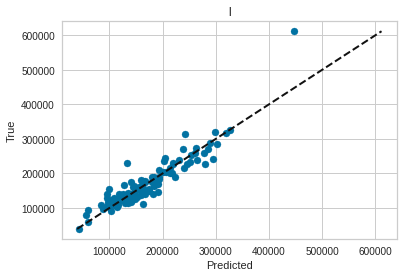

---------------------------------------------------------------------------
0.8831431542270958
score of  r  training set is: 88.31431542270958
r2 score is : 0.8503906964228654
MSE : 740627786.3897585
MAE : 16927.164733669433
RMSE: 27214.477514546525


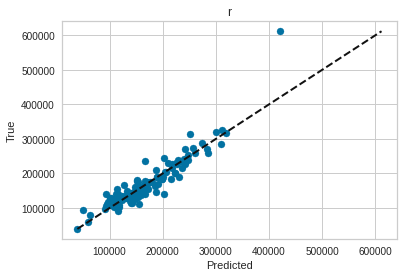

---------------------------------------------------------------------------
1.0
score of  dec  training set is: 100.0
r2 score is : 0.7776884434424679
MSE : 1100533937.965812
MAE : 24981.880341880344
RMSE: 33174.296344697534


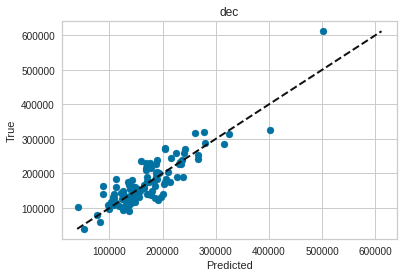

---------------------------------------------------------------------------
0.979833346977789
score of  ran  training set is: 97.9833346977789
r2 score is : 0.8567644055980175
MSE : 709075295.9722677
MAE : 17268.403333333332
RMSE: 26628.46777364908


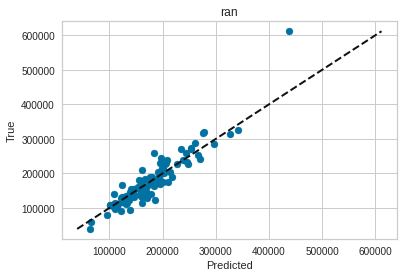

---------------------------------------------------------------------------
0.8808663806005151
score of  ada  training set is: 88.08663806005151
r2 score is : 0.7417434466763799
MSE : 1278476504.0371072
MAE : 24641.9153916823
RMSE: 35755.78979741753


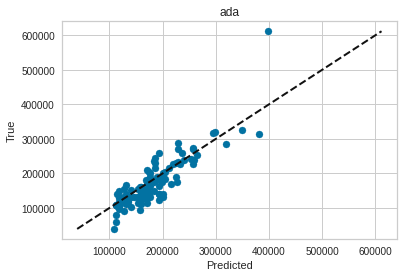

---------------------------------------------------------------------------


In [175]:
#here i am creating mpdel using different alogorithms so that we can get good model to predict
model = []
model.append(('lr', LinearRegression()))
model.append(('l', Lasso()))
model.append(('r', Ridge()))
model.append(('dec', DecisionTreeRegressor()))
model.append(('ran', RandomForestRegressor()))
model.append(('ada', AdaBoostRegressor()))

for n,m in model:
    m.fit(x_train,y_train)
    print(m.score(x_train,y_train))
    prediction = m.predict(x_test)
    print("score of ",n," training set is:", m.score(x_train,y_train)*100)
    print("r2 score is :", r2_score(y_test, prediction))
    print("MSE :",mean_squared_error(y_test, prediction))
    print("MAE :",mean_absolute_error(y_test, prediction))
    print("RMSE:", sqrt(mean_squared_error(y_test, prediction)))
    plt.scatter(prediction,y_test)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.ylabel("True")
    plt.xlabel("Predicted")
    plt.title(n)
    plt.show()
    print('-'*75)

# **Hyperparameter Tuning** (Lasso and Ridge Regression)


Here we are using hyperparameter tuning for inproving the model tuning and i am going to using regularization methods like lasso and ridge along ith the ensemble algorithm randomforest regressor

# **Lasso**

In [176]:
#creating the parameters 
lasso_model = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

In [177]:
#using randomisedcv model for getting best parameters 
l_model = RandomizedSearchCV(l, lasso_model, n_iter=30, n_jobs=-1, cv = 10, verbose = 2)
l_model.fit(x_train, y_train)#fitting the model

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 157 out of 160 | elapsed:   15.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   15.2s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=None, selection='cyclic',
                                   tol=0.0001, warm_start=False),
                   iid='deprecated', n_iter=30, n_jobs=-1,
                   param_distributions={'alpha': [1e-15, 1e-10, 1e-08, 0.001,
                                                  0.01, 1, 5, 10, 20, 30, 35,
                                                  40, 45, 50, 55, 100]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [178]:
#getting best estimators, and parameters and also getting best score
print(l_model.best_estimator_)
print(l_model.best_index_)
print(l_model.best_params_)
print(l_model.best_score_)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
15
{'alpha': 100}
0.76931767450043


# **Ridge**

In [179]:
#setting the parameters
ridge_model = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

In [180]:
#using randomised cv method for the for getting best model
r_model = RandomizedSearchCV(r, ridge_model, n_iter=30, n_jobs= -1, cv = 10, verbose = 2)
r_model.fit(x_train, y_train)#fitting with the training data


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    1.9s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='deprecated', n_iter=30, n_jobs=-1,
                   param_distributions={'alpha': [1e-15, 1e-10, 1e-08, 0.001,
                                                  0.01, 1, 5, 10, 20, 30, 35,
                                                  40, 45, 50, 55, 100]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [181]:
#getting best parameters and score 
print(r_model.best_estimator_)
print(r_model.best_index_)
print(r_model.best_params_)
print(r_model.best_score_)


Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
6
{'alpha': 5}
0.7662344424447846


# **Hyperparameter tuning**(Random forest regressor)

it is basically used to tune the model for getting better accuracy by predicting information

In [182]:
#parameter for hyperparameter tuning
parameter = {
    
    'max_depth' : [10, 20, 30, 40, 50, 60, 100],
    'max_leaf_nodes' : [10, 20, 30, 100],
    'min_samples_leaf' : [10, 20, 30],
    'n_estimators' : [10, 20 ,30, 100],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'criterion' : ['mse', 'mae']

}

In [183]:
#tuning model using randomized search cv where i tuned a model based on cheanging the input variables so that we can acheive better accuracy
rn_model = RandomizedSearchCV(ran, parameter, n_iter=30, n_jobs= -1, cv=10, verbose=2)
rn_model.fit(x_train, y_train) #fitting the model

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:   45.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.4min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [184]:
print(rn_model.best_estimator_)
print(rn_model.best_index_)
print(rn_model.best_params_)
print(rn_model.best_score_) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=100, max_features='auto', max_leaf_nodes=100,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
26
{'n_estimators': 30, 'min_samples_leaf': 10, 'max_leaf_nodes': 100, 'max_features': 'auto', 'max_depth': 100, 'criterion': 'mae'}
0.8102370400510811


In [185]:
#now based on the tuned model we have got the best parameters now i  will create a regressor based on the tumed parametersm that will be used for predctiom
random_model = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=30,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

0.8712075591150283
score of randomforest_ regressor training set is: 87.12075591150284
r2 score is : 0.7872187733302383
MSE : 1053354872.496101
MAE : 20785.46051959822
RMSE: 32455.42901420502


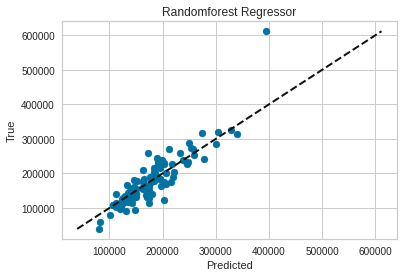

In [186]:
#Here i am predicting using that tuned model
random_model.fit(x_train, y_train)
print(random_model.score(x_train,y_train))
prediction_final = random_model.predict(x_test)
print("score of randomforest_ regressor training set is:", random_model.score(x_train,y_train)*100)
print("r2 score is :", r2_score(y_test, prediction_final))
print("MSE :",mean_squared_error(y_test, prediction_final))
print("MAE :",mean_absolute_error(y_test, prediction_final))
print("RMSE:", sqrt(mean_squared_error(y_test, prediction_final)))
plt.scatter(prediction_final,y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Randomforest Regressor")
plt.show()
print('\n')

In [187]:
#getting the important features by the model, actually with this method we can reduce the dimesions of the data and we can get good accuracy
#using less feautures
random_model.feature_importances_

array([5.27644983e-04, 1.57764293e-03, 9.48273532e-03, 7.20470609e-01,
       1.21939535e-03, 5.02808071e-03, 5.61578320e-03, 9.23602129e-04,
       2.35261633e-02, 9.64270865e-05, 8.46864442e-04, 3.88696670e-02,
       2.13491637e-02, 1.94844416e-03, 0.00000000e+00, 1.16452692e-01,
       1.02740347e-03, 0.00000000e+00, 8.19317678e-03, 2.37857699e-03,
       5.17649395e-03, 1.88630907e-04, 6.31081147e-04, 3.15320470e-03,
       6.10027058e-03, 1.14311117e-02, 9.00272533e-04, 2.59229296e-03,
       3.87661730e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.78386264e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.44849863e-05, 1.25190507e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

As we can see as we check the model feature importance many eature have been discarded by the model thus giving us only importantant to make further mode and predictions 

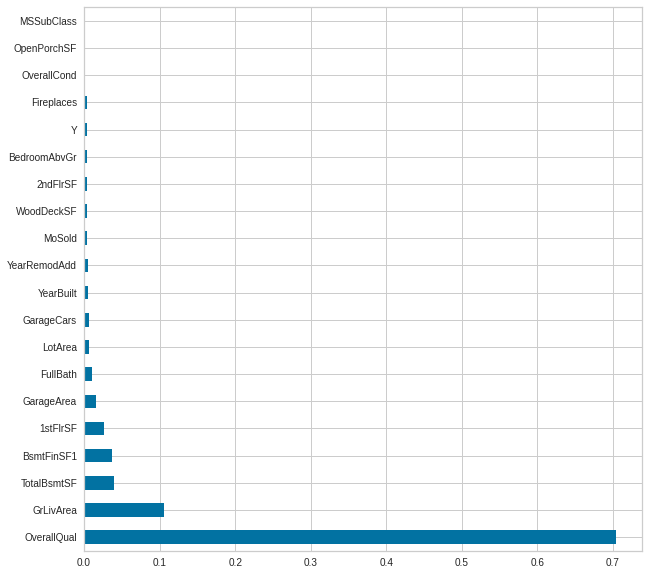

In [188]:
#plotting the feature importance to know the reason why Attrition happens 
random_model.fit(x,y)
important_of_features = pd.Series(random_model.feature_importances_, index=x.columns)
important_of_features = important_of_features.nlargest(20)
plt.figure(figsize=(10,10))
important_of_features.plot(kind = "barh")

As we can see that all the features in the dataset are not useful some are important based on the models prespective and some are useful from the doain knowledge, if we take last 10 features into consideration we might still get approx accuracy and but with small no of features

In [189]:
#lets predict using that tuned model
print(df_Test.shape)
df_Test.head()

(292, 174)


MSSubClass  LotFrontage  LotArea  ...  Family  Normal  Partial
0          20    86.000000    14157  ...       0       1        0
1         120    66.425101     5814  ...       0       0        0
2          20    66.425101    11838  ...       0       1        0
3          70    75.000000    12000  ...       0       1        0
4          60    86.000000    14598  ...       0       1        0

[5 rows x 174 columns]

In [190]:
#predicted and created as a dataset so we can concatenate with test dataset
final_y_predict = random_model.predict(df_Test)
df1 = pd.DataFrame(final_y_predict, index=range(len(df_Test)), columns=["predicted"])

In [191]:

#saving the model
import pickle
filename = 'finalized_model.pkl'
pickle.dump(random_model, open(filename, 'wb'))

In [192]:
#concatenating with the original test dataset 
predicted_df = pd.concat([df_Test, df1], axis = 1)

In [193]:
#predicted dataset
predicted_df

MSSubClass  LotFrontage  LotArea  ...  Normal  Partial      predicted
0            20    86.000000    14157  ...       1        0  379644.588032
1           120    66.425101     5814  ...       0        0  253616.446774
2            20    66.425101    11838  ...       1        0  241906.357329
3            70    75.000000    12000  ...       1        0  177490.414554
4            60    86.000000    14598  ...       1        0  189152.033971
..          ...          ...      ...  ...     ...      ...            ...
287          20    78.000000    10206  ...       1        0  254121.699396
288          20    57.000000     9245  ...       1        0  136387.126584
289          20    66.425101    11241  ...       1        0  143718.778980
290          50    50.000000     5000  ...       1        0  166590.858336
291         160    21.000000     1953  ...       1        0  109584.914689

[292 rows x 175 columns]

In this model creation process we observed that thete are more dimensions in the dataset that we cannot say which are important and we need to have some domain knowledge based on that we can make some changes to the dataset. After creation of the model accuracy is good when compared with the cross validation score but messed at RMSE value and we need to reduce the dimensions if it increases we might get into "The curse of dimendionality"

# **Residual plot**

Residuals, in the context of regression models, are the difference between the observed value of the target variable (y) and the predicted value (ŷ), i.e. the error of the prediction. The residuals plot shows the difference between residuals on the vertical axis and the dependent variable on the horizontal axis, allowing you to detect regions within the target that may be susceptible to more or less error.

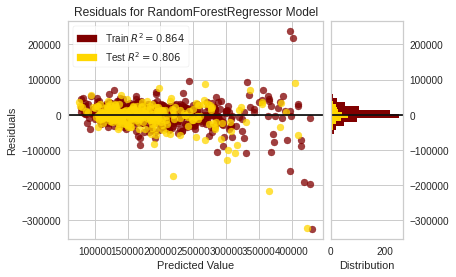

In [194]:
#for randomforest
from yellowbrick.regressor import residuals_plot



visualizer = residuals_plot(
    random_model, x, y, train_color="maroon", test_color="gold"
)

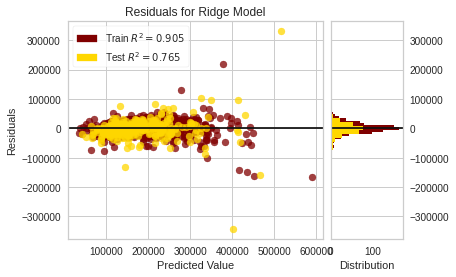

In [195]:
#for Ridge regressor
from yellowbrick.regressor import residuals_plot



visualizer = residuals_plot(
    r, x, y, train_color="maroon", test_color="gold"
)

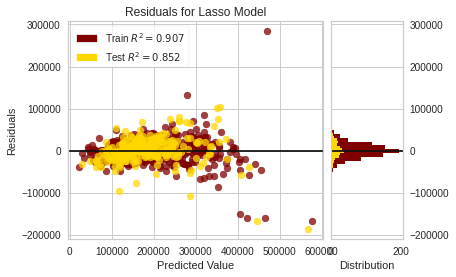

In [196]:
#for lasso regressor
from yellowbrick.regressor import residuals_plot



visualizer = residuals_plot(
    l, x, y, train_color="maroon", test_color="gold"
)

As the name suggests its the observed value between the predicted and the actual value , when we compared wit the three plots we can easilysay the accuracy differences between the test and training data

# **Prediction error**

A prediction_error helps find where the regression is making the most errors. More about Prediction Error Plot, it also shows you the best fit of the linear regression

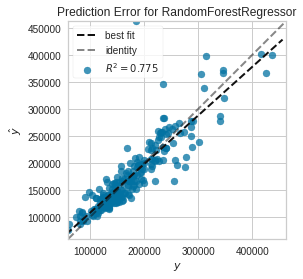

In [197]:
#for Randonforest Regressor
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(random_model, x, y)





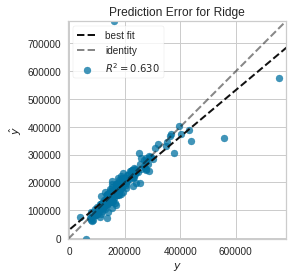

In [198]:
#for Ridge regressor
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(r, x, y)


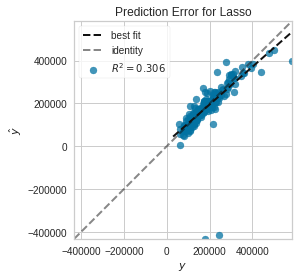

In [199]:
#for lasso regressor
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(l, x, y)


Here with the prediction error plot we have prediction line and the best fit line as we compared with the three of the plots with randomforest, lasso and ridge, ridge regressor has a less difference between best and predicted fit
we have to try with reducing the dimensions of the data so that we can attin better accuracy